# Assignment 4: Sampling 
--------------------------
**Dr. Dave Wanik - University of Connecticut**

Let's try to do three styles of sampling with code. 

For this assignment, I'd like you to apply the topics of  undersampling, oversampling and SMOTE to a toy dataset to see if you get better performance by using these sampling methods. In my experience, sampling helps sometimes but not all times. 

# Data
Everybody will have the same dataset.

In [99]:
import pandas as pd
df = pd.read_csv('/content/sample_data/california_housing_train.csv')

In [100]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


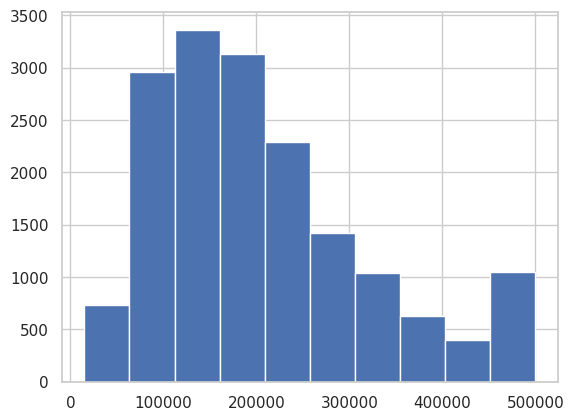

In [101]:
import matplotlib.pyplot as plt

df['median_house_value'].hist()
plt.show()

In [102]:
# create a new target variable for SMOTE
import numpy as np

# nice imbalanced data!
df['median_house_value'] = np.where(df['median_house_value'] < 380000, 1, 0)
df['median_house_value'].value_counts()

1    15304
0     1696
Name: median_house_value, dtype: int64

# (5 pts) Split data into train and test 
Remember, your dataset should be split into train and test FIRST so that the test dataset retains the original distribution of 0s and 1s. No SMOTE data in the test partition - your boss only cares about real rows!

In [103]:
y=df['median_house_value']
X=df.drop('median_house_value',axis=1)
print(y.shape,X.shape)

(17000,) (17000, 8)


In [104]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape) 

(13600, 8) (3400, 8)
(13600,) (3400,)


In [105]:
from collections import Counter
Counter(y)

Counter({1: 15304, 0: 1696})

# (15 pts) Majority Undersampling
Perform majority undersampling and evaluate model performance (use confusion matrices, classifcation report) and make comments about what you see.

In [106]:
from sklearn.datasets import make_classification
from imblearn.under_sampling import RandomUnderSampler

In [107]:
# use imblearn to perform majority undersampling on X_train, evaluate on test partition
undersample=RandomUnderSampler(sampling_strategy='majority')
X_train_under,y_train_under=undersample.fit_resample(X_train,y_train)
counter=Counter(y_train_under)
print(counter)

Counter({0: 1346, 1: 1346})


In [108]:
X_train_under.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2692 entries, 0 to 2691
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           2692 non-null   float64
 1   latitude            2692 non-null   float64
 2   housing_median_age  2692 non-null   float64
 3   total_rooms         2692 non-null   float64
 4   total_bedrooms      2692 non-null   float64
 5   population          2692 non-null   float64
 6   households          2692 non-null   float64
 7   median_income       2692 non-null   float64
dtypes: float64(8)
memory usage: 168.4 KB


In [109]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
DTC = DecisionTreeClassifier(min_samples_split=5)

In [110]:
# Fit original data and apply to the Decision Tree Classification model
DTC.fit(X_train,y_train)
train_preds_org=DTC.predict(X_train)
test_preds_org=DTC.predict(X_test)

print('Train results (original): \n')
print(classification_report(y_train, train_preds_org))
print('Test results (original): \n')
print(classification_report(y_test, test_preds_org))
#Confusion matrix
print('⊙ Confusion matrix for original datasets: \n')
cf=confusion_matrix(y_test, test_preds_org)
print(cf)

Train results (original): 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1346
           1       1.00      0.99      0.99     12254

    accuracy                           0.99     13600
   macro avg       0.97      0.98      0.97     13600
weighted avg       0.99      0.99      0.99     13600

Test results (original): 

              precision    recall  f1-score   support

           0       0.59      0.61      0.60       350
           1       0.95      0.95      0.95      3050

    accuracy                           0.92      3400
   macro avg       0.77      0.78      0.78      3400
weighted avg       0.92      0.92      0.92      3400

⊙ Confusion matrix for original datasets: 

[[ 212  138]
 [ 146 2904]]


In [111]:
# Fit undersampling dataset and apply to the Decision Tree Classification model
DTC.fit(X_train_under,y_train_under)
train_preds_under=DTC.predict(X_train_under)
test_preds_under=DTC.predict(X_test)

print('<Classification report of Undersampling dataset> \n')

print('Train results : \n')
print(classification_report(y_train_under, train_preds_under))
print('Test results: \n')
print(classification_report(y_test, test_preds_under))

#Confusion matrix
print('⊙ Confusion matrix for undersampling datasets: \n')
cf_under=confusion_matrix(y_test, test_preds_under)
print(cf_under)

<Classification report of Undersampling dataset> 

Train results : 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1346
           1       0.99      0.98      0.98      1346

    accuracy                           0.98      2692
   macro avg       0.98      0.98      0.98      2692
weighted avg       0.98      0.98      0.98      2692

Test results: 

              precision    recall  f1-score   support

           0       0.35      0.83      0.50       350
           1       0.98      0.83      0.90      3050

    accuracy                           0.83      3400
   macro avg       0.67      0.83      0.70      3400
weighted avg       0.91      0.83      0.85      3400

⊙ Confusion matrix for undersampling datasets: 

[[ 292   58]
 [ 531 2519]]


- When I applied an undersampled dataset to the DTC model, the accuracy decreased from 92% to 81%. 
- The training results showed an accuracy of 96%, with precision and recall scores of 0.96. However, the test results differed, with a recall score of 0.81 and a high precision score for class '1', but a precision score of under 50% for class '0'. 
- I can find in the results that modeling with an undersampled dataset shows low recall and high precision for class '1'. This means the model missed many true positive results in the classification. 
- Overall, the metrics show this undersampling is not a good strategy for balancing the training datasets.

# (15 pts) Minority Oversampling
Perform minority oversampling and evaluate model performance (use confusion matrices, classifcation report) and make comments about what you see.

In [112]:
# use imblearn to perform minority oversampling on X_train, evaluate on test partition
from imblearn.over_sampling import RandomOverSampler

In [113]:
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_train_over, y_train_over = oversample.fit_resample(X_train,y_train)
# summarize class distribution
print(Counter(y_train_over))

Counter({1: 12254, 0: 12254})


In [114]:
X_train_over.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24508 entries, 0 to 24507
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           24508 non-null  float64
 1   latitude            24508 non-null  float64
 2   housing_median_age  24508 non-null  float64
 3   total_rooms         24508 non-null  float64
 4   total_bedrooms      24508 non-null  float64
 5   population          24508 non-null  float64
 6   households          24508 non-null  float64
 7   median_income       24508 non-null  float64
dtypes: float64(8)
memory usage: 1.5 MB


In [115]:
# Fit oversampling dataset
DTC.fit(X_train_over, y_train_over)
train_preds_over=DTC.predict(X_train_over)
test_preds_over=DTC.predict(X_test)

print('<Classification report of Oversampling dataset> \n')
print('1) Train results: \n')
print(classification_report(y_train_over, train_preds_over))
print('2) Test results: \n')
print(classification_report(y_test, test_preds_over))

#Confusion matrix
print('⊙ Confusion matrix for oversampling datasets: \n')
cf_over=confusion_matrix(y_test, test_preds_over)
print(cf_over)

<Classification report of Oversampling dataset> 

1) Train results: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12254
           1       1.00      1.00      1.00     12254

    accuracy                           1.00     24508
   macro avg       1.00      1.00      1.00     24508
weighted avg       1.00      1.00      1.00     24508

2) Test results: 

              precision    recall  f1-score   support

           0       0.59      0.59      0.59       350
           1       0.95      0.95      0.95      3050

    accuracy                           0.92      3400
   macro avg       0.77      0.77      0.77      3400
weighted avg       0.92      0.92      0.92      3400

⊙ Confusion matrix for oversampling datasets: 

[[ 205  145]
 [ 142 2908]]



- When I applied an oversampled dataset to the DTC model, the weighted average accuracy score from the test results was 92%, which was the same as the original dataset. 
- The overall scores from the test results were also very similar to the modeling results from the original dataset. 
- Although the oversampled dataset did not improve the classification results, the overall scores were close to the results from the original dataset modeling. 
- Based on these findings, oversampling appears to be a good strategy for addressing an unbalanced dataset.

# (15 pts) SMOTE
Perform synthetic minority oversampling and evaluate model performance (use confusion matrices, classifcation report) and make comments about what you see.

In [116]:
# use imblearn to perform synthetic minority data on X_train, evaluate on test partition
from imblearn.over_sampling import SMOTE

In [117]:
smotespl = SMOTE(k_neighbors=9)
X_train_smt, y_train_smt = smotespl.fit_resample(X_train, y_train)
counter = Counter(y_train_smt)
print(counter)

Counter({1: 12254, 0: 12254})


In [118]:
DTC.fit(X_train_smt, y_train_smt)
train_preds_smt = DTC.predict(X_train_smt)
test_preds_smt = DTC.predict(X_test)

print('<Classification report of SMOTE dataset> \n')
print('Train results: \n')
print(classification_report(y_train_smt, train_preds_smt))
print('Test results: \n')
print(classification_report(y_test, test_preds_smt))

#Confusion matrix
print('⊙ Confusion matrix for SMOTE datasets: \n')
cf_smt=confusion_matrix(y_test, test_preds_smt)
print(cf_smt)

<Classification report of SMOTE dataset> 

Train results: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12254
           1       0.99      0.99      0.99     12254

    accuracy                           0.99     24508
   macro avg       0.99      0.99      0.99     24508
weighted avg       0.99      0.99      0.99     24508

Test results: 

              precision    recall  f1-score   support

           0       0.46      0.73      0.57       350
           1       0.97      0.90      0.93      3050

    accuracy                           0.89      3400
   macro avg       0.72      0.82      0.75      3400
weighted avg       0.92      0.89      0.90      3400

⊙ Confusion matrix for SMOTE datasets: 

[[ 256   94]
 [ 295 2755]]


- When I applied a SMOTE dataset to the DTC model, the average accuracy score from the test results was 89%, slightly decreased from the original dataset.
- Although the recall scores are improved, precision scores are decreased.
- Overall, the classification result using SMOTE strategy decreased.

# (5 pts) Comparison of 3 methods
Out of the three methods, did any do the best? Make a few comments about what you see.

In [119]:
print("Train result: \n")
print('Undersampling: \n')
print(classification_report(y_train_under, train_preds_under))
print('Oversampling: \n')
print(classification_report(y_train_over, train_preds_over))
print('SMOTE: \n')
print(classification_report(y_train_smt, train_preds_smt))

Train result: 

Undersampling: 

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1346
           1       0.99      0.98      0.98      1346

    accuracy                           0.98      2692
   macro avg       0.98      0.98      0.98      2692
weighted avg       0.98      0.98      0.98      2692

Oversampling: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12254
           1       1.00      1.00      1.00     12254

    accuracy                           1.00     24508
   macro avg       1.00      1.00      1.00     24508
weighted avg       1.00      1.00      1.00     24508

SMOTE: 

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     12254
           1       0.99      0.99      0.99     12254

    accuracy                           0.99     24508
   macro avg       0.99      0.99      0.99     24508
weighted avg    

In [120]:
print("Test result: \n")
print('Undersampling: \n')
print(classification_report(y_test, test_preds_under))
print('Oversampling: \n')
print(classification_report(y_test, test_preds_over))
print('SMOTE: \n')
print(classification_report(y_test, test_preds_smt))

Test result: 

Undersampling: 

              precision    recall  f1-score   support

           0       0.35      0.83      0.50       350
           1       0.98      0.83      0.90      3050

    accuracy                           0.83      3400
   macro avg       0.67      0.83      0.70      3400
weighted avg       0.91      0.83      0.85      3400

Oversampling: 

              precision    recall  f1-score   support

           0       0.59      0.59      0.59       350
           1       0.95      0.95      0.95      3050

    accuracy                           0.92      3400
   macro avg       0.77      0.77      0.77      3400
weighted avg       0.92      0.92      0.92      3400

SMOTE: 

              precision    recall  f1-score   support

           0       0.46      0.73      0.57       350
           1       0.97      0.90      0.93      3050

    accuracy                           0.89      3400
   macro avg       0.72      0.82      0.75      3400
weighted avg     

In [121]:
# Confusion Matrix

print("Comparision of confusion matrix: \n")
print('Undersampling: \n')
print(cf_under,'\n')
print('Oversampling: \n')
print(cf_over,'\n')
print('SMOTE: \n')
print(cf_smt)

Comparision of confusion matrix: 

Undersampling: 

[[ 292   58]
 [ 531 2519]] 

Oversampling: 

[[ 205  145]
 [ 142 2908]] 

SMOTE: 

[[ 256   94]
 [ 295 2755]]


**Comments for the comparison result**
- When I compared the modeling results using three different sampling methods, I found that the oversampling method produced the highest accuracy. 
- The other two models had a higher number of misclassified positive values, which means that two models have a greater number of FN compared to the original dataset.
- All three sampling methods resulted in a low precision score for class '0'.

# (40 pts) Reproducibility - run it 30 times or more!
This is one is a little tougher - choose any method and replicate it at least 30 times using a for loop. This means you will split into train and test 30 times (which means you should choose a random_state equal to 'i' as your for loop spins.) 

The purpose of this is so that you can show the distribution (hopefully a bell curve but not necessarily) of accuracy, precision and recall. Do some folds get predicted better than others? 



In [122]:
from imblearn.over_sampling import SMOTE

In [128]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

n_iterations=30

accuracy_scores=[]
precision_scores=[]
recall_scores=[]

# split the sample dataset into train and validation data 
for i in range(n_iterations):
  X_train_it, X_test_it, y_train_it, y_test_it=train_test_split(X,y, test_size=0.2, random_state=i)

# Resampling the dataset using SMOTE 
  smotespl = SMOTE(k_neighbors=9)
  X_res, y_res = smotespl.fit_resample(X_train_it, y_train_it) 

# Fit the decision tree model 
  DTC.fit(X_res,y_res)
  train_preds_it=DTC.predict(X_res)
  test_preds_it= DTC.predict(X_test_it)

# Check the accuracy
  accuracy=accuracy_score(y_test_it,test_preds_it)
  accuracy_scores.append(accuracy)
# Precision score
  precision=precision_score(y_test_it,test_preds_it)
  precision_scores.append(precision)
# Recall score  
  recall=recall_score(y_test_it,test_preds_it)
  recall_scores.append(recall)

# Calculate the average classification metrics 
average_accuracy=np.mean(accuracy_scores)
average_precision=np.mean(precision_scores)
average_recall=np.mean(recall_scores)

print('Average accuracy: ',average_accuracy)
print('Average precision: ', average_precision)
print('Average recall: ', average_recall)

Average accuracy:  0.8911470588235295
Average precision:  0.9679790168441563
Average recall:  0.9092454728362935


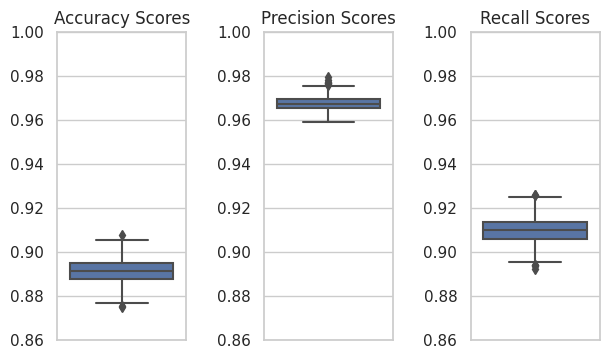

In [127]:
import seaborn as sns

sns.set(style="whitegrid")
fig, ax = plt.subplots(ncols=3, figsize=(7,4))
sns.boxplot(y=accuracy_scores, ax=ax[0])
sns.boxplot(y=precision_scores, ax=ax[1])
sns.boxplot(y=recall_scores, ax=ax[2])

for a in ax:
  a.set_ylim([0.86,1])

ax[0].set_title('Accuracy Scores')
ax[1].set_title('Precision Scores')
ax[2].set_title('Recall Scores')

plt.subplots_adjust(wspace=0.6)

plt.show()

- Based on the result of this assignment, my conclusion is that oversampling is the best strategy to address an unbalanced dataset. However, the metrics from applying SMOTE have a small gap with using the original dataset, I iterated the SMOTE to check the improvement of the classification metrics. 
- From the iteration results, I could find the precision improved a lot and other metrics improved slightly. 
- Precision: 0.92 → 0.97 / Accuracy 0.88 → 0.89 / Recall 0.88 → 0.91
- In conclusion, the iteration improves the classification results.



# (5 pts) Comments on the repeated experiment
Make some comments about what you saw! Feel free to run 100 or 1000 times if it runs fast enough 😏

In [125]:
n_iterations=500

accuracy_scores=[]
precision_scores=[]
recall_scores=[]

# split the sample dataset into train and validation data 
for i in range(n_iterations):
  X_train_it, X_test_it, y_train_it, y_test_it=train_test_split(X,y, test_size=0.2, random_state=i)

# Resampling the dataset using SMOTE 
  smotespl = SMOTE(k_neighbors=9)
  X_res, y_res = smotespl.fit_resample(X_train_it, y_train_it) 

# Fit the decision tree model 
  DTC.fit(X_res,y_res)
  train_preds_it=DTC.predict(X_res)
  test_preds_it= DTC.predict(X_test_it)

# Check the accuracy
  accuracy=accuracy_score(y_test_it,test_preds_it)
  accuracy_scores.append(accuracy)
# Precision score
  precision=precision_score(y_test_it,test_preds_it)
  precision_scores.append(precision)
# Recall score  
  recall=recall_score(y_test_it,test_preds_it)
  recall_scores.append(recall)

# Calculate the average classification metrics 
average_accuracy=np.mean(accuracy_scores)
average_precision=np.mean(precision_scores)
average_recall=np.mean(recall_scores)

print('Average accuracy: ',average_accuracy)
print('Average precision: ', average_precision)
print('Average recall: ', average_recall)

Average accuracy:  0.8913011764705882
Average precision:  0.9674227025138324
Average recall:  0.909895846583109


In [126]:
cf_smt_it=confusion_matrix(y_test_it, test_preds_it)
print(cf_smt_it)

[[ 246   97]
 [ 283 2774]]


- I iterated the SMOTE sample about 500 times and applied it to the DTC model. But the classification result does not show significant differences compared to the results of 30 times iterations.  
- From these results, I can conclude that it is difficult to say that the performance of a model improves simply by repeating a large amount of data. While there may be some improvement up to a certain point, repeating data does not significantly improve the model's performance beyond that point.
- Also, resampling data is not always give us much higher accurate classification results. As we need to balance the dataset to find the accuracy metrics, we should consider multiple sampling strategies to get a better modeling result. 
- In this case, the simple oversampling method shows the best classification results, but it can be changed depending on the datasets. So, we should consider undersampling, oversampling, and synthetic oversampling methods (SMOTE) to get the best classification result. 
